### **Imports**

In [1]:
import sys, os, warnings
from os import listdir

path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("crest")

from eda_utils import plot_dist_subplots
from eda_utils import plot_subplots
from eda_utils import time_series_subplots

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### **Load Data**

In [2]:
all_paths = []
fol_name = r"C:\Users\angel\Desktop\Data Analysis\Ironhack\Final Bootcamp Project\Smart-Home-Energy-Consumption-Project\data"
for e in os.listdir(fol_name):
    full = os.path.join(fol_name, e)
    if os.path.isfile(full):
        all_paths.append(full)

data = pd.concat(pd.read_csv(f, low_memory=False) for f in all_paths)
display(data.head())

,Unnamed: 0,time,use,gen,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,temperature,humidity,visibility,apparenttemperature,pressure,windspeed,cloudcover,windbearing,precipintensity,dewpoint,precipprobability,furnace,kitchen,month,day,weekday,hour,minute
0,0,2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567,1,1,Friday,5,0
1,1,2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567,1,1,Friday,5,1
2,2,2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617,1,1,Friday,5,2
3,3,2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.175417,0.000650,1,1,Friday,5,3
4,4,2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.300917,0.000783,1,1,Friday,5,4


In [3]:
# Create some usefull variables to simplify exploration

data["time"] = pd.to_datetime(data["time"])
data = data.set_index('time').drop(columns="Unnamed: 0", axis=1)

energy_cols = list(data.columns[:11]) + list(data.columns[22:24])
meteo_cols = list(data.columns[11:22])
time_cols = list(data.columns[-5:])

energy_df = pd.DataFrame(data[energy_cols])
meteo_df = data[meteo_cols]

data.head()

,use,gen,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,temperature,humidity,visibility,apparenttemperature,pressure,windspeed,cloudcover,windbearing,precipintensity,dewpoint,precipprobability,furnace,kitchen,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567,1,1,Friday,5,1
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617,1,1,Friday,5,2
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.175417,0.000650,1,1,Friday,5,3
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.300917,0.000783,1,1,Friday,5,4


### **Univariate Analysis** - Energy

In [4]:
data.describe()

,use,gen,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,temperature,humidity,visibility,apparenttemperature,pressure,windspeed,cloudcover,windbearing,precipintensity,dewpoint,precipprobability,furnace,kitchen,month,day,hour,minute
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.031368,0.081287,0.063556,0.042137,0.014139,0.058530,0.015642,0.010983,0.035313,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,0.225945,202.356843,0.002598,38.694013,0.056453,0.235989,0.009788,6.268381,15.411681,11.501399,29.499107
std,1.058207,0.128428,0.190951,0.104466,0.076199,0.057967,0.014292,0.202706,0.137841,0.098859,0.096056,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,0.289945,106.520474,0.011257,19.087939,0.165836,0.273885,0.079883,3.319007,8.788936,6.922017,17.318119
min,0.000000,0.000000,0.000000,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,0.000000,-27.240000,0.000000,0.000300,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.367667,0.003367,0.000000,0.040383,0.005083,0.007133,0.012733,0.029833,0.000983,0.003617,0.001483,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,0.040000,148.000000,0.000000,24.600000,0.000000,0.085300,0.000600,3.000000,8.000000,6.000000,14.000000
50%,0.562333,0.004283,0.000017,0.042217,0.005433,0.008083,0.012933,0.031317,0.001000,0.004000,0.001617,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,0.120000,208.000000,0.000000,39.030000,0.000000,0.088950,0.000750,6.000000,15.000000,12.000000,29.000000
75%,0.970250,0.083917,0.000233,0.068283,0.125417,0.053192,0.013100,0.032883,0.001017,0.004067,0.001750,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,0.290000,295.000000,0.000000,54.790000,0.000000,0.219417,0.000850,9.000000,23.000000,18.000000,44.000000
max,14.714567,0.613883,1.401767,0.971750,0.851267,1.273933,1.088983,7.027900,1.633017,1.929800,0.465217,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,1.000000,359.000000,0.191000,75.490000,0.840000,2.472633,2.265867,12.000000,31.000000,23.000000,59.000000


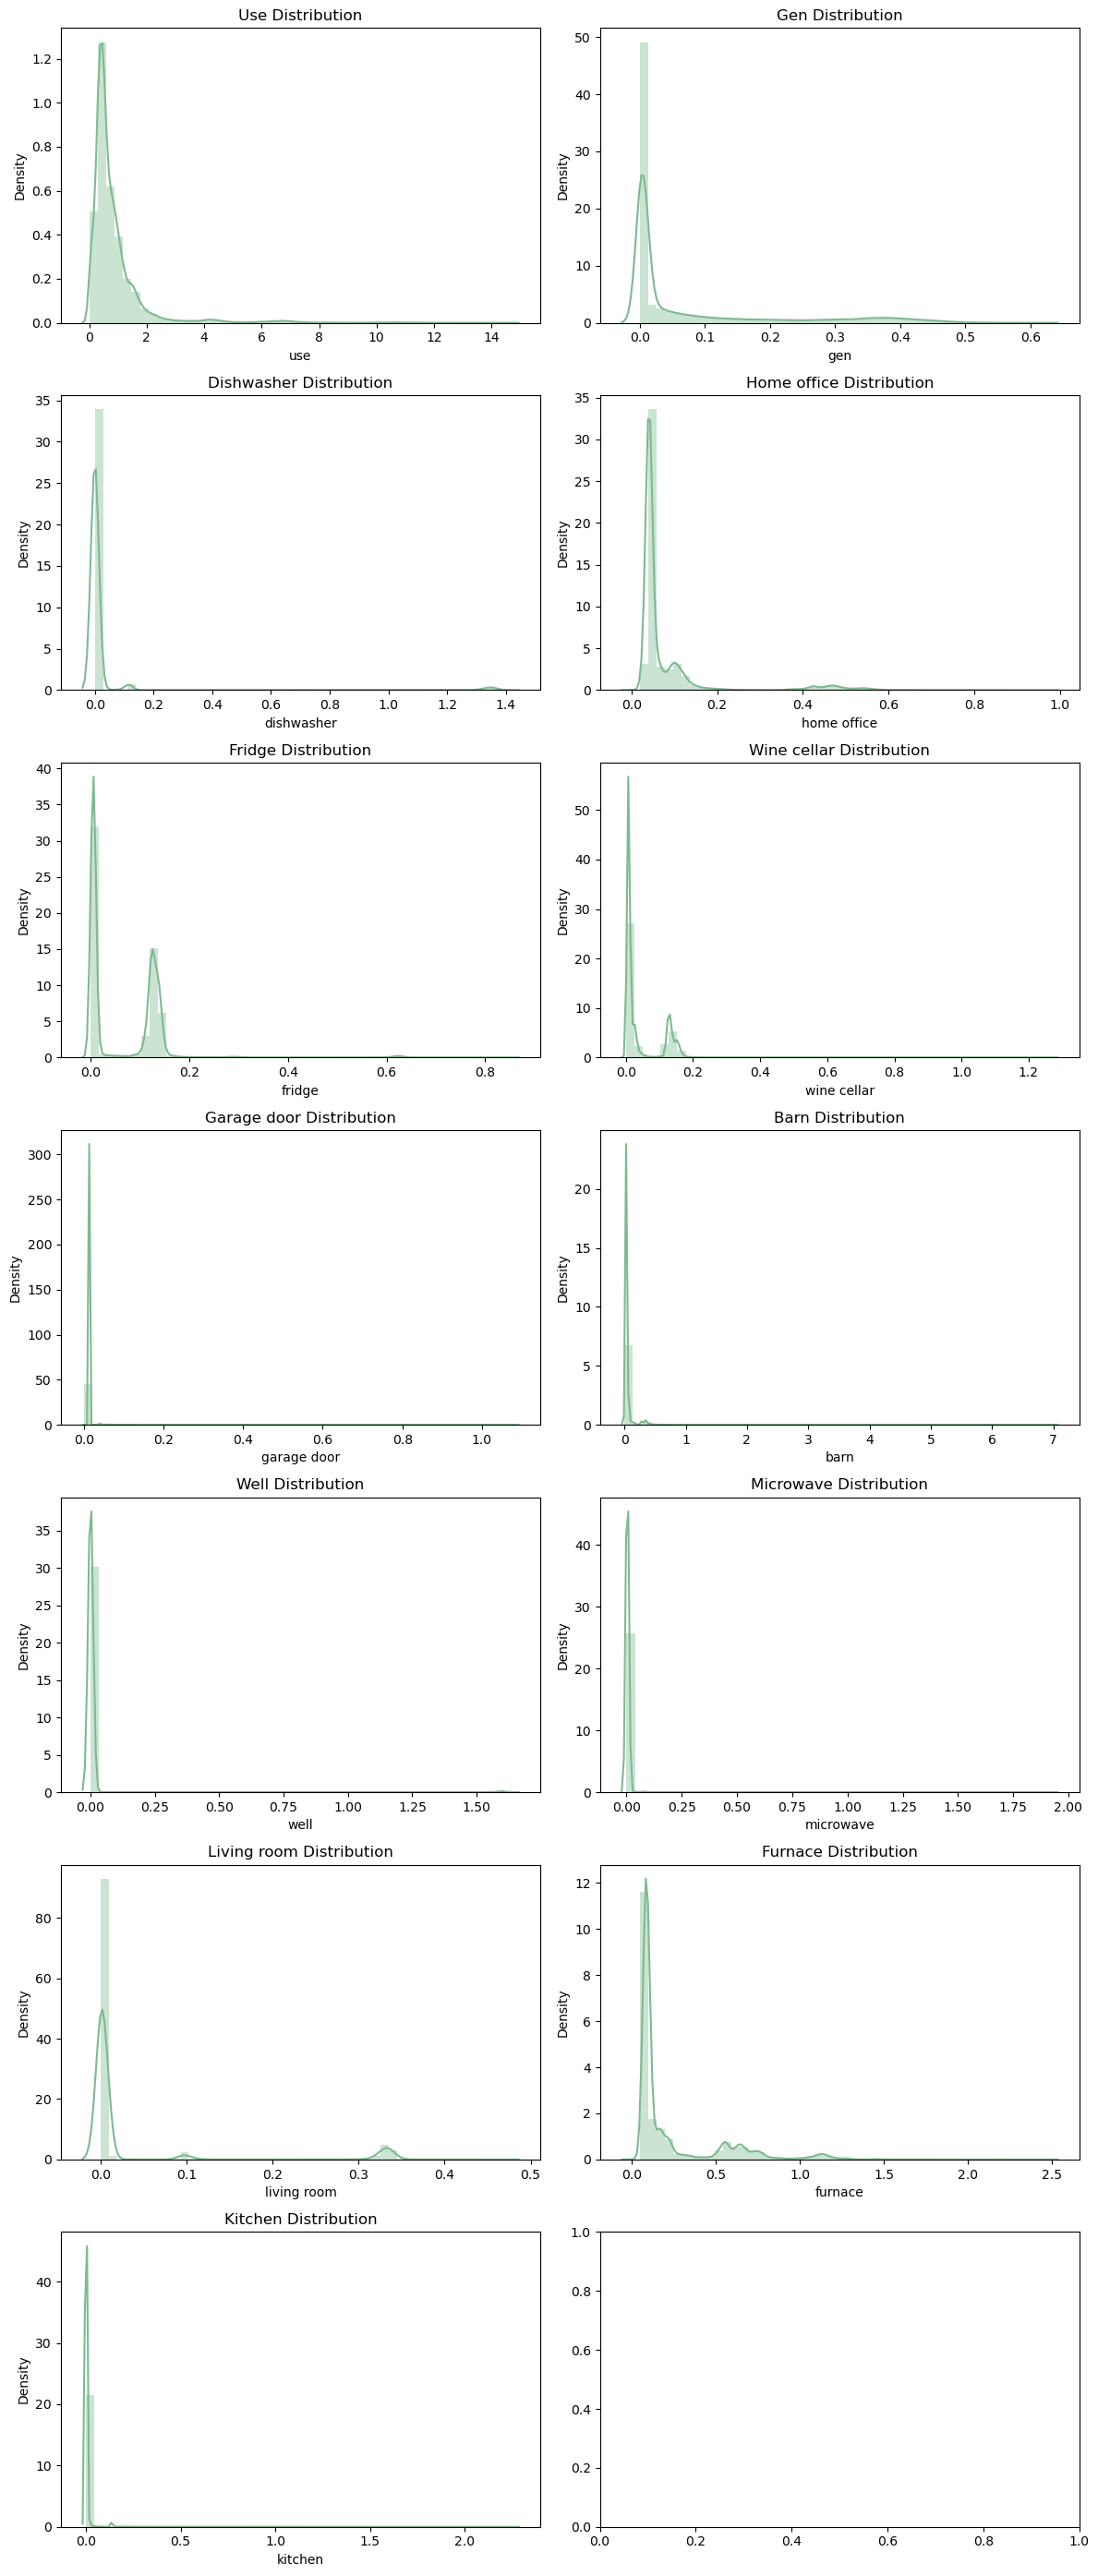

In [5]:
plot_dist_subplots(data,energy_cols)

> ##### **Observations**
>
> * There seem to be outliers present in general energy usage, energy generation, and also in all individual devices. This likely suggests that devices may respond to occasional patterns rather than exhibiting continuous energy consumption. For some individual appliances it may reasemble different devices in the same room or maybe different modes of use of the same device.
> * Changes in energy generation seem to be more gradual and stable compared to usage fluctuations.
>
> ##### **Impact**
> * My hypothesis is that values considered outliers will have a significant impact on overall consumption. Let's examine the correlation of these outlier values with the overall consumption.
>
>

In [6]:
use_outliers = energy_df[energy_df["use"] >= 1.5].sort_values("use", ascending=False) #I defined the upper threshold by q3 + 1.5 x IQR
use_outliers

,use,gen,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,furnace,kitchen
time,,,,,,,,,,,,,
2016-07-30 21:04:00,14.714567,0.074300,0.000467,0.094717,0.116250,0.128750,0.014783,5.706050,0.002350,0.003900,0.089917,0.765983,0.000483
2016-07-25 20:03:00,13.957750,0.030033,0.000067,0.074817,0.165217,0.017117,0.014483,0.027950,0.001650,0.003667,0.002017,1.287667,0.000283
2016-07-25 20:02:00,13.726550,0.029700,0.000067,0.064267,0.144750,0.016967,0.014483,0.028167,0.001733,0.003700,0.002083,1.287883,0.000350
2016-07-25 20:01:00,13.718633,0.029467,0.000017,0.062767,0.144983,0.016650,0.014650,0.028033,0.001667,0.003733,0.001833,1.135433,0.000483
2016-08-13 18:05:00,13.650800,0.003217,0.000150,0.037183,0.113567,0.143750,0.014217,0.026600,1.551233,0.003750,0.315600,1.391867,0.000633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-24 05:19:00,1.500067,0.004367,0.606917,0.042183,0.136867,0.133433,0.012317,0.032550,0.001000,0.003450,0.001717,0.086550,0.001100
2016-05-08 00:32:00,1.500067,0.003450,0.000017,0.454800,0.620200,0.006817,0.012917,0.030733,0.001017,0.004167,0.001667,0.084233,0.000867
2016-03-29 00:11:00,1.500050,0.003250,0.000017,0.420100,0.112167,0.138217,0.012617,0.138800,0.001150,0.004017,0.001733,0.175617,0.000717


> It appears that the total energy usage does not match the sum of the consumption from individual devices. Probably that refers to the non-smart devices consumption of the house. Nevertheless, this difference seems to be highly relevant in producing outliers. I will plot the difference to assert its relation with outliers, sum of devices consumption and total usage

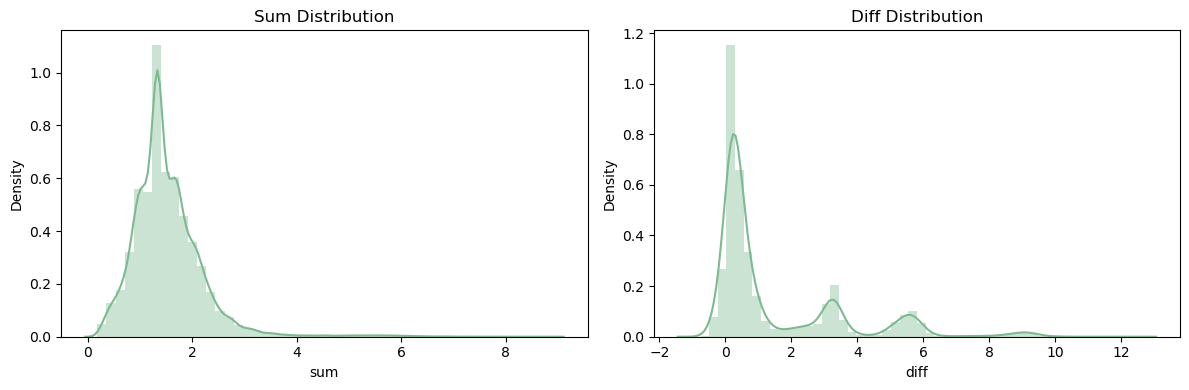

Correlation of Sum of Outliers with Total Use:  0.08049100030826722
Correlation of Difference with Total Use:  0.9422550330642281


In [7]:
use_outliers["sum"] = use_outliers[list(use_outliers.columns[2:])].sum(axis=1)
use_outliers["diff"] = use_outliers["use"] - use_outliers["sum"]

plot_dist_subplots(use_outliers, use_outliers.columns[-2:])

print("Correlation of Sum of Outliers with Total Use: ", use_outliers["sum"].corr(data["use"]))
print("Correlation of Difference with Total Use: ", use_outliers["diff"].corr(data["use"])) 

> ##### **Observations**
>
> * The difference between the total energy and the sum of individual device consumption appears to be more effective in predicting the total energy consumption. Additionally, the similarity in distribution shapes between the difference in outliers and the total usage suggests the significant impact of the difference variable on outlier values.
> * There is a low correlation between the sum of device in outliers and total energy usage.
>
> ##### **Impact**
> * Eventhough there is a relevant correlation between this difference and the total energy consumption, we couldn't use it as a predictor in our model because of data leakage 
> * I will create a binary variable for outliers to check later how important is to be an outlier in relation with the total use. Also i will check how important is this difference of total consumption and the sum of individual appliances in the whole dataset


In [8]:
data["gen_outlier"] = 0
data["use_outlier"] = 0
data.loc[data["gen"] > 0.08, "gen_outlier"] = 1
data.loc[data["use"] > 1.5, "use_outlier"] = 1
data["sum"] = energy_df[list(energy_df.columns[2:])].sum(axis=1)
data["use_diff"] = data["use"] - data["sum"]

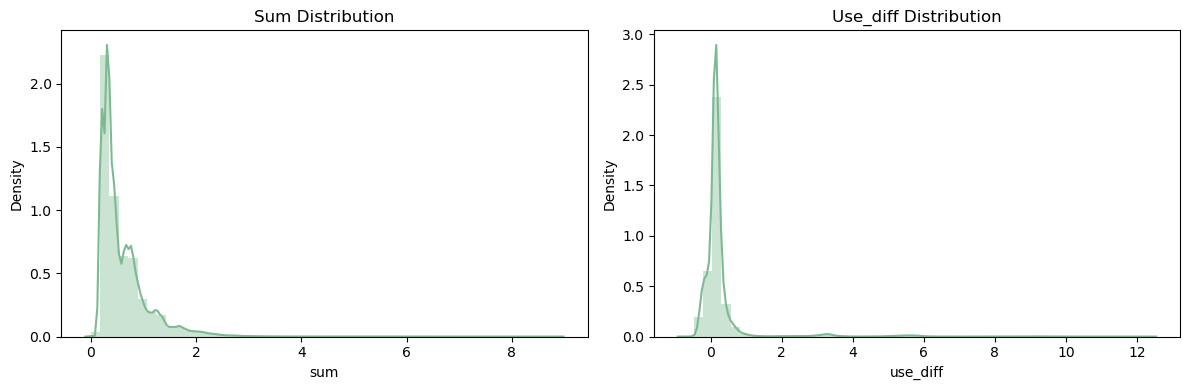

<Axes: >

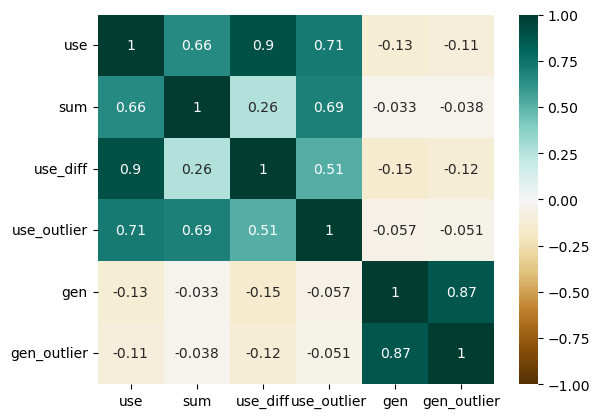

In [9]:
plot_dist_subplots(data, data.columns[-2:])

sns.heatmap(data[["use", "sum", "use_diff","use_outlier","gen", "gen_outlier"]].corr(), annot=True, vmin=-1,vmax=1, cmap="BrBG")

> ##### **Observations**
> * Outliers have a great impact in total use. This means that we could potentially reduce or optimise consumption if we find a way to spot that anomalies.
> * The difference between total use and the sum of individual devices seems to have the strongest correlation with use, but as said earlier, we cannot explain nor use this variable as a predictor for our model.
> * There is a little correlation between sum and use difference meaning that the may go together sometimes, but they are indeed different phenomena
> * Even though both distribution are skewed, use difference seams to be more responsible of outliers in use. Also there is a 0.51 of correlation between them. 

### **Univariate Analysis** - Weather

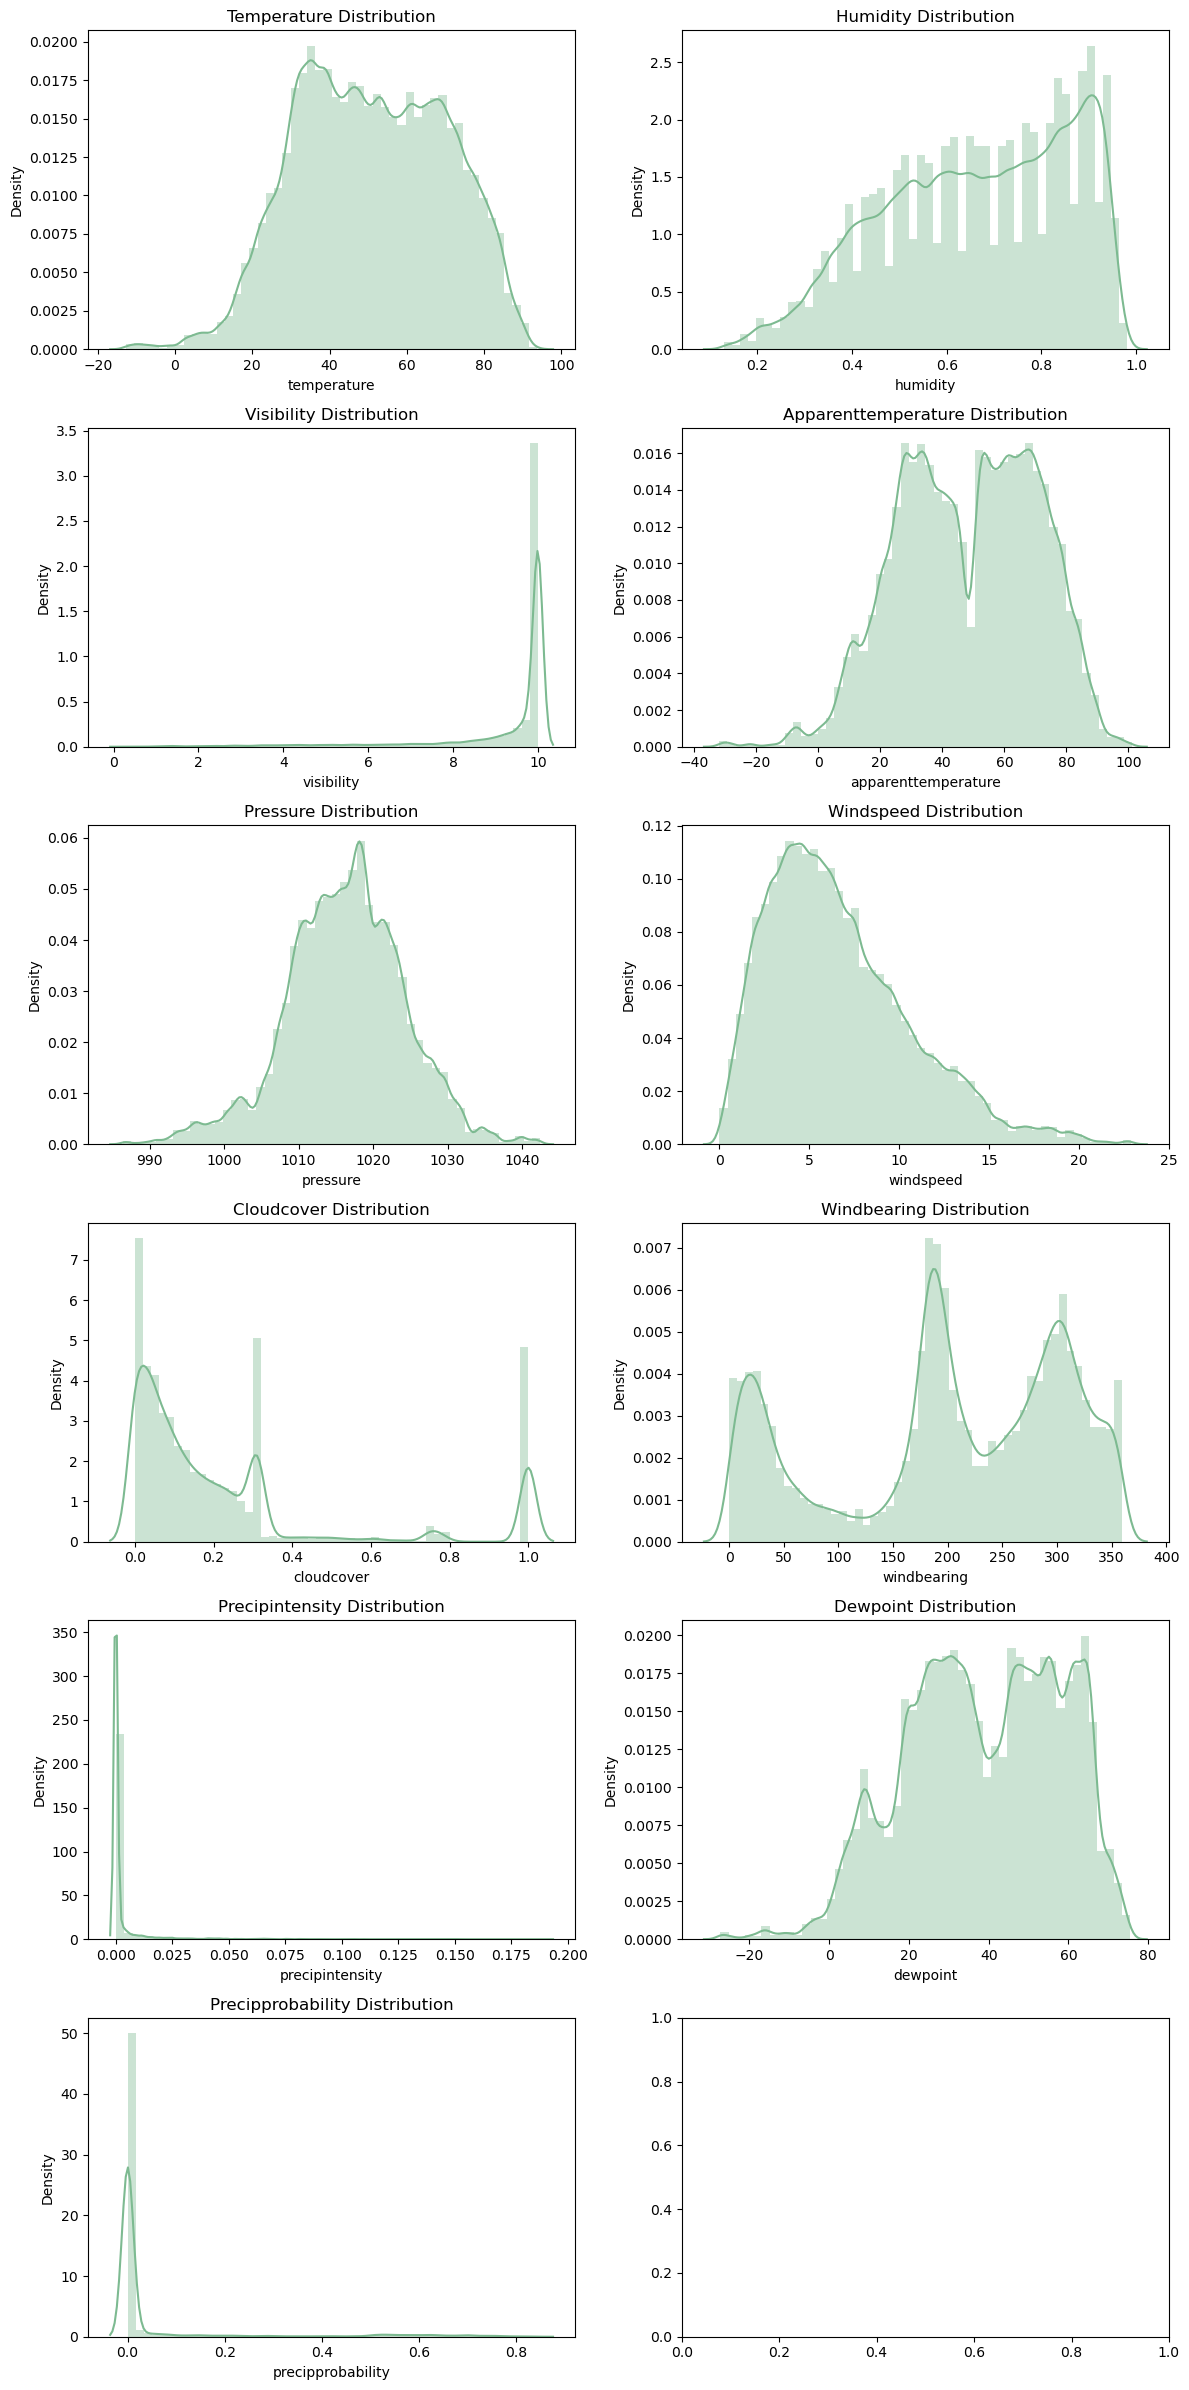

In [10]:
plot_dist_subplots(data, meteo_cols)

### **Multivariate Analisys** - Correlations

<Axes: >

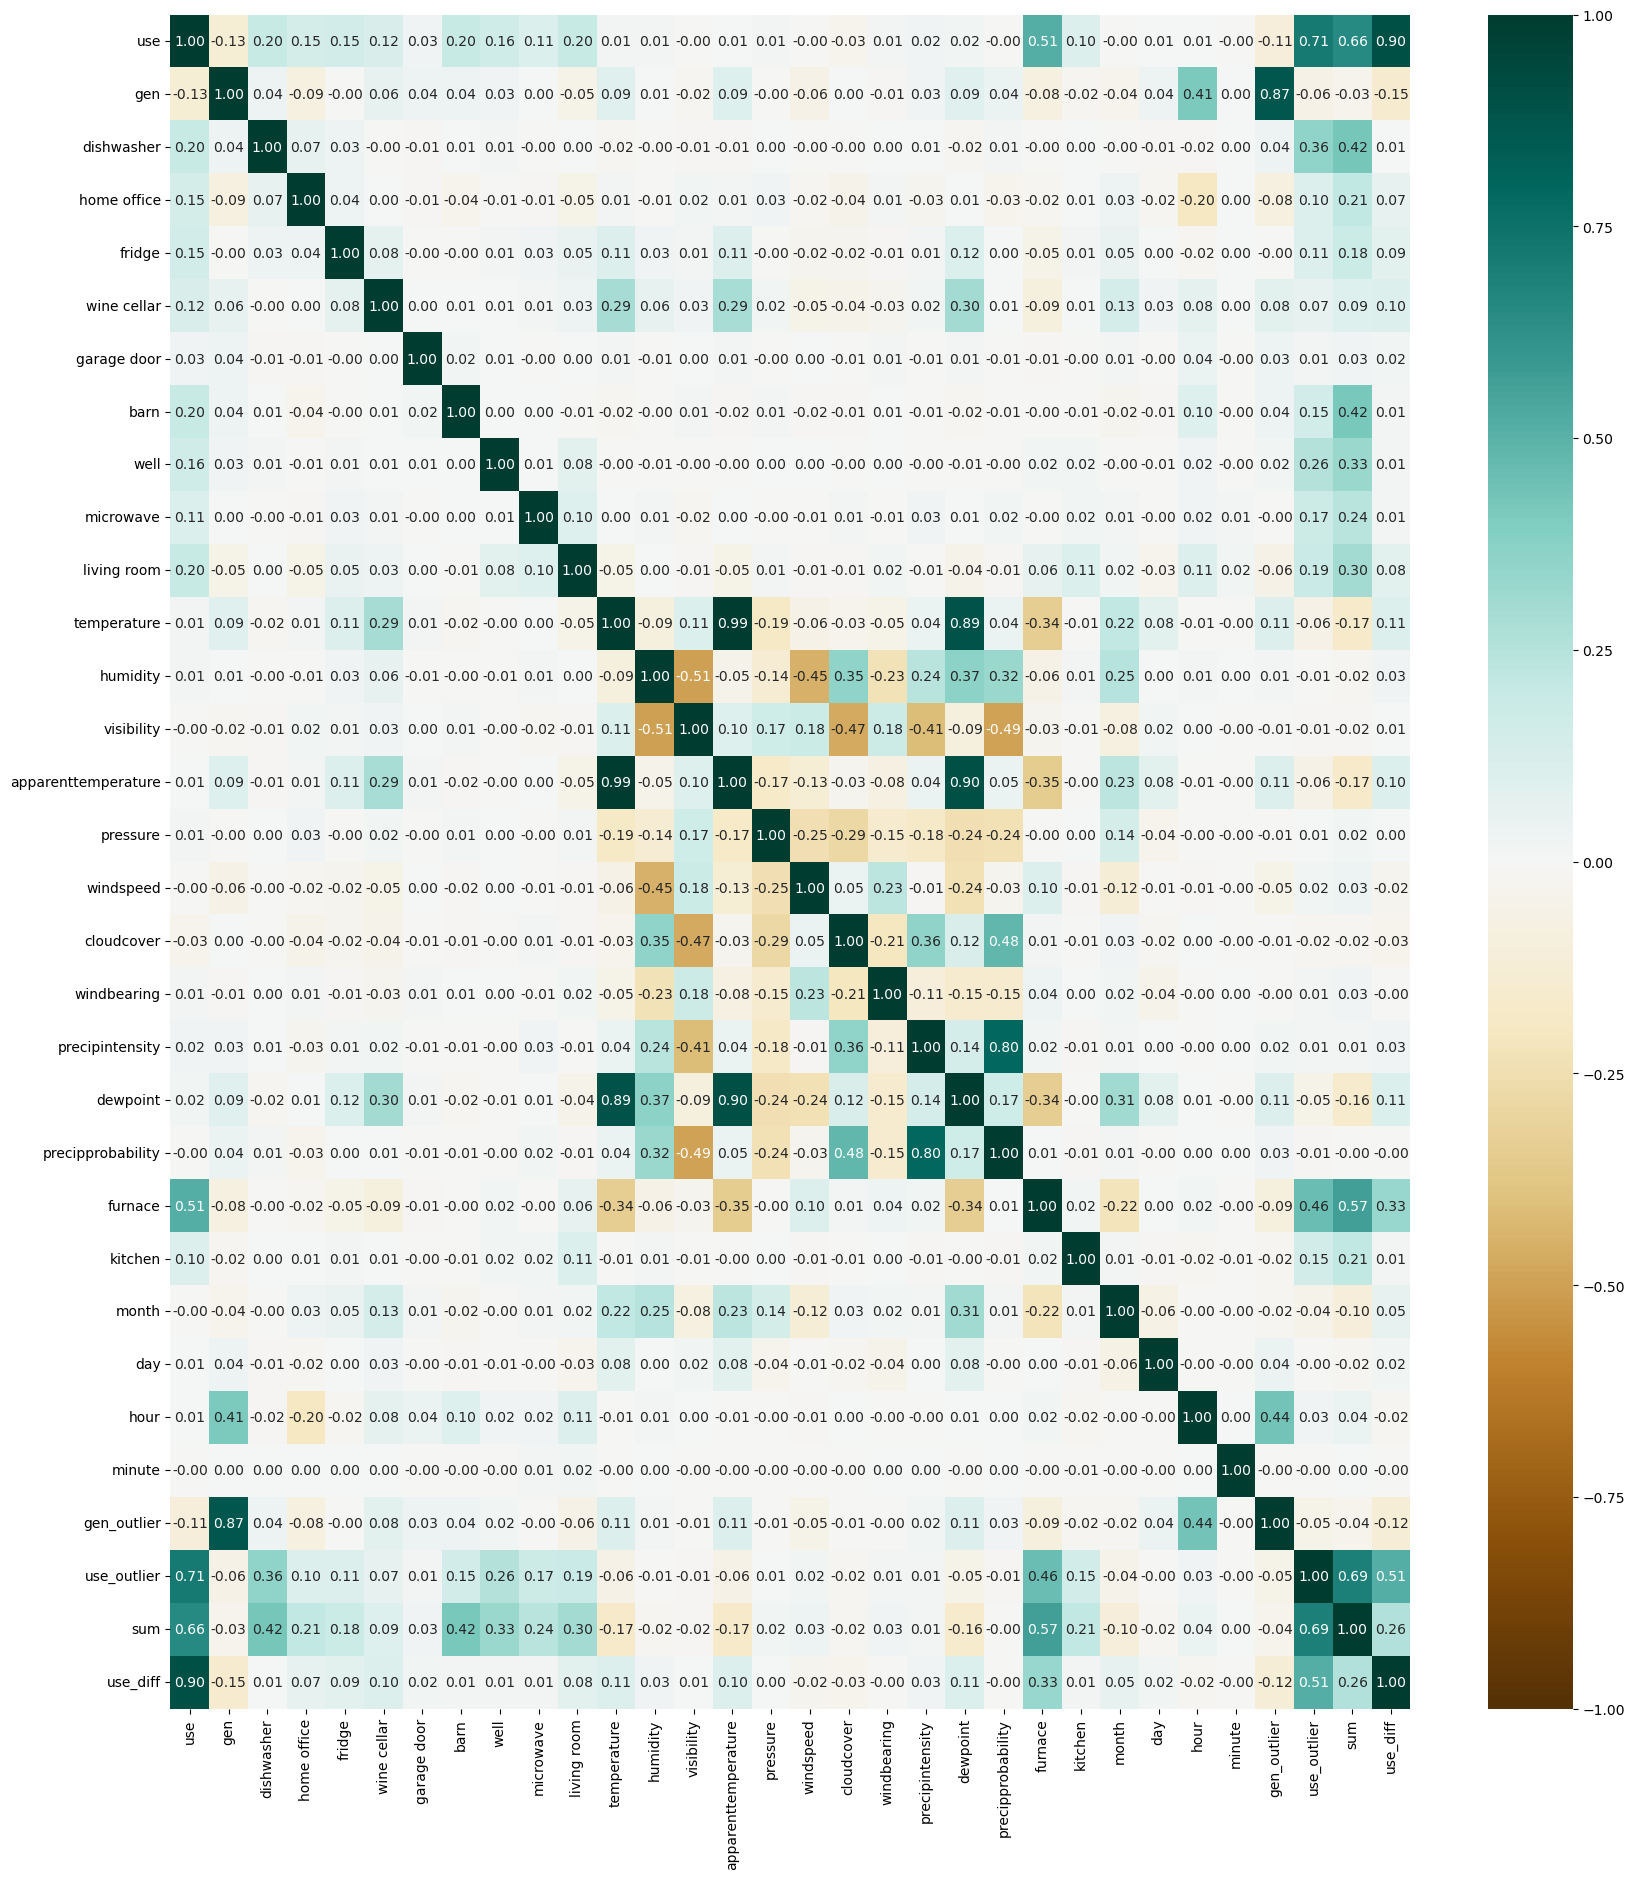

In [11]:
plt.figure(figsize=(20,22))
sns.heatmap(data.select_dtypes("number").corr(), annot=True, vmax=1, vmin=-1, center=0, fmt="0.2f", cmap="BrBG")

> ##### **Observations**
> 
> *Time:*
> * Consumption patterns don't show significant correlations with day or minute variables while some home applications show slight correlations with specific times of the day. This suggests that they may be instead influenced by seasonality factors, events, or daily routines.
> 
> *Energy:*
> * Furnace usage exhibits a notable correlation with general energy consumption, while the garage door consumes relatively less energy.
> * Furnace and dishwasher seems to be closely related with outliers. At the same time, furnace, dishwasher and barn seems related with the sum of consumption, reinforcing the relation between consumption spikes and total energy usage.
> * Interestingly enough, the difference of energy used by smart devices and the total energy consumption doesnt seem to be strongly correlated with any individual device
> 
> *Weather:*
> * Apparent temperature closely aligns with temperature. Also, dewpoint correlates strongly with temperature but it provides additional insights into humidity, pressure, and wind conditions.
> 
> *Intersegments:*
> * Low impact observed between meteorological measurements and solar energy generation. Solar generation appears instead to be influenced by daily hours as expected.
> * Monthly variations align with meteorological patterns as expected.
> * Furnace, wine cellar, and to a lesser extent, the fridge, correlate with temperature-related variables which make sense.
> * There's no high correlation between general energy consumption and time/weather variables.

### **Multivariate Analysis** - Time Series

In [12]:
added_cols = list(data.columns[-4:]) #Create a new object for plotting purposes

##### *Energy Columns*

---------------------- DAILY ----------------------------


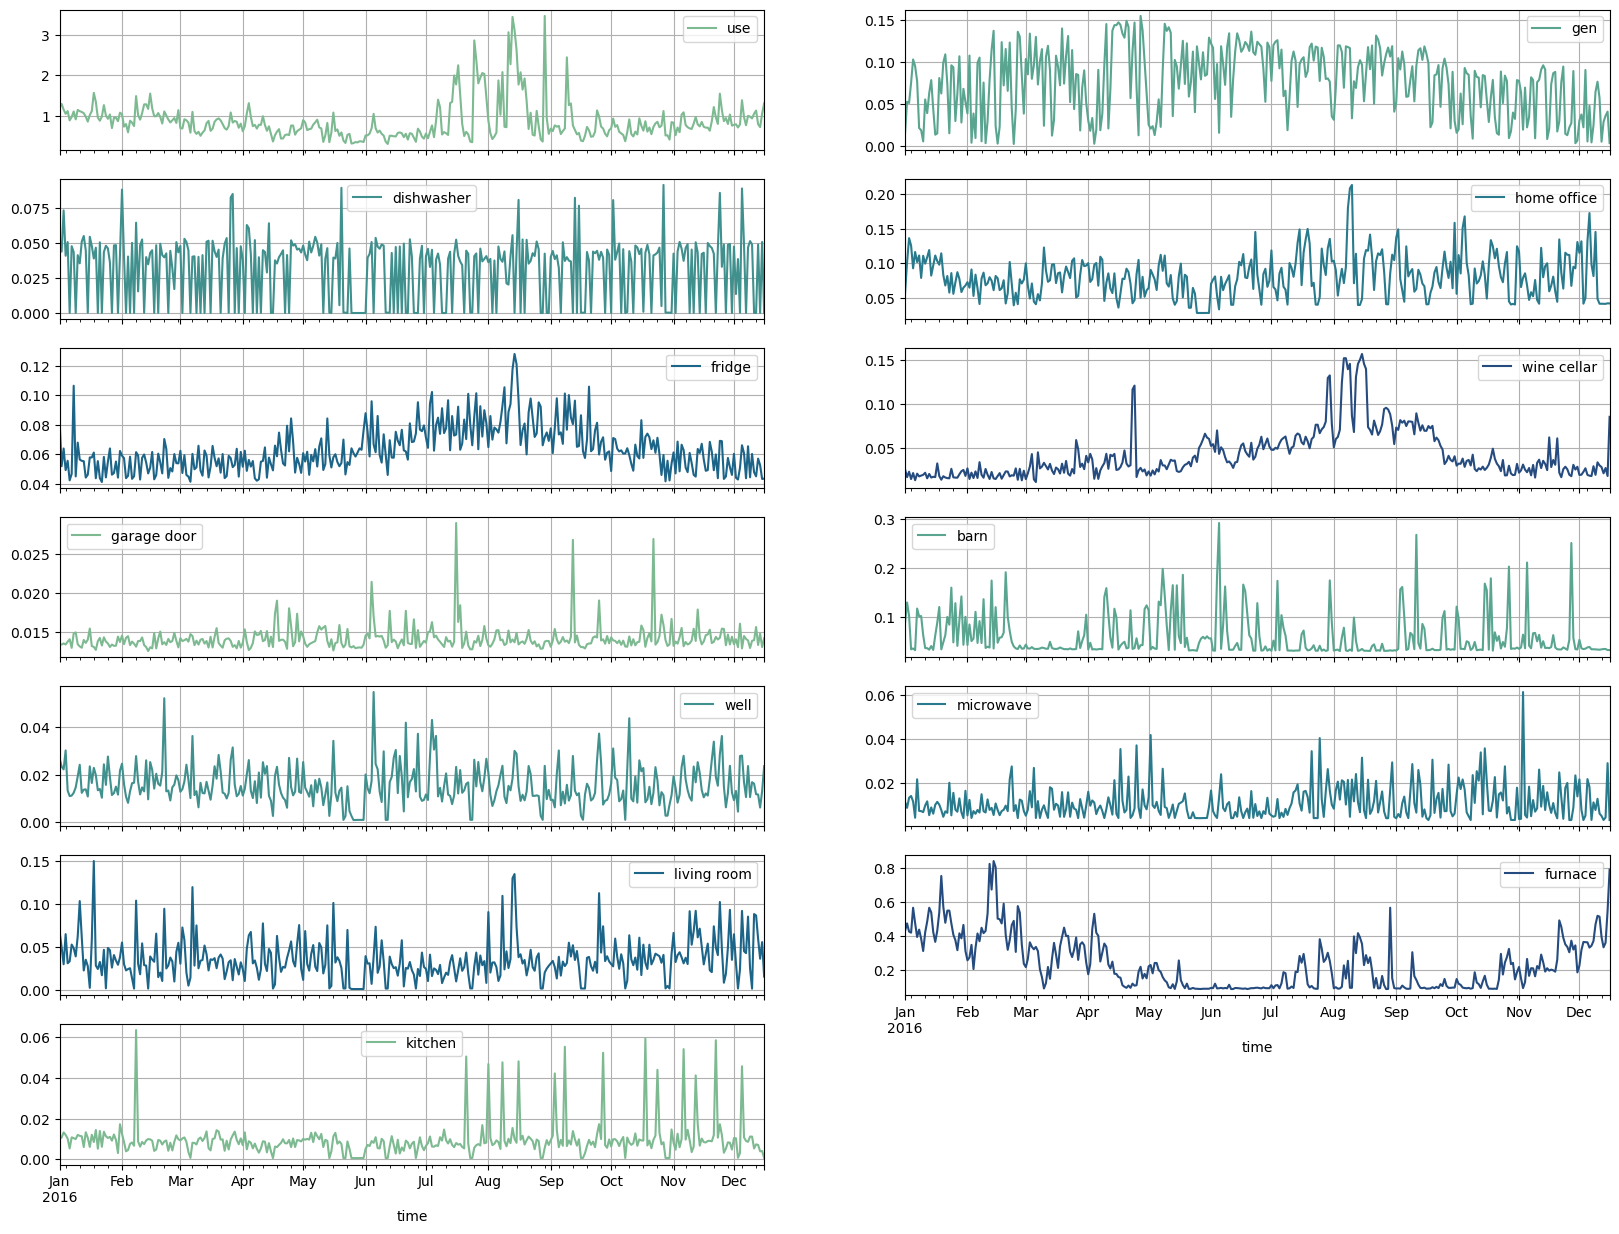

---------------------- WEEKLY ----------------------------


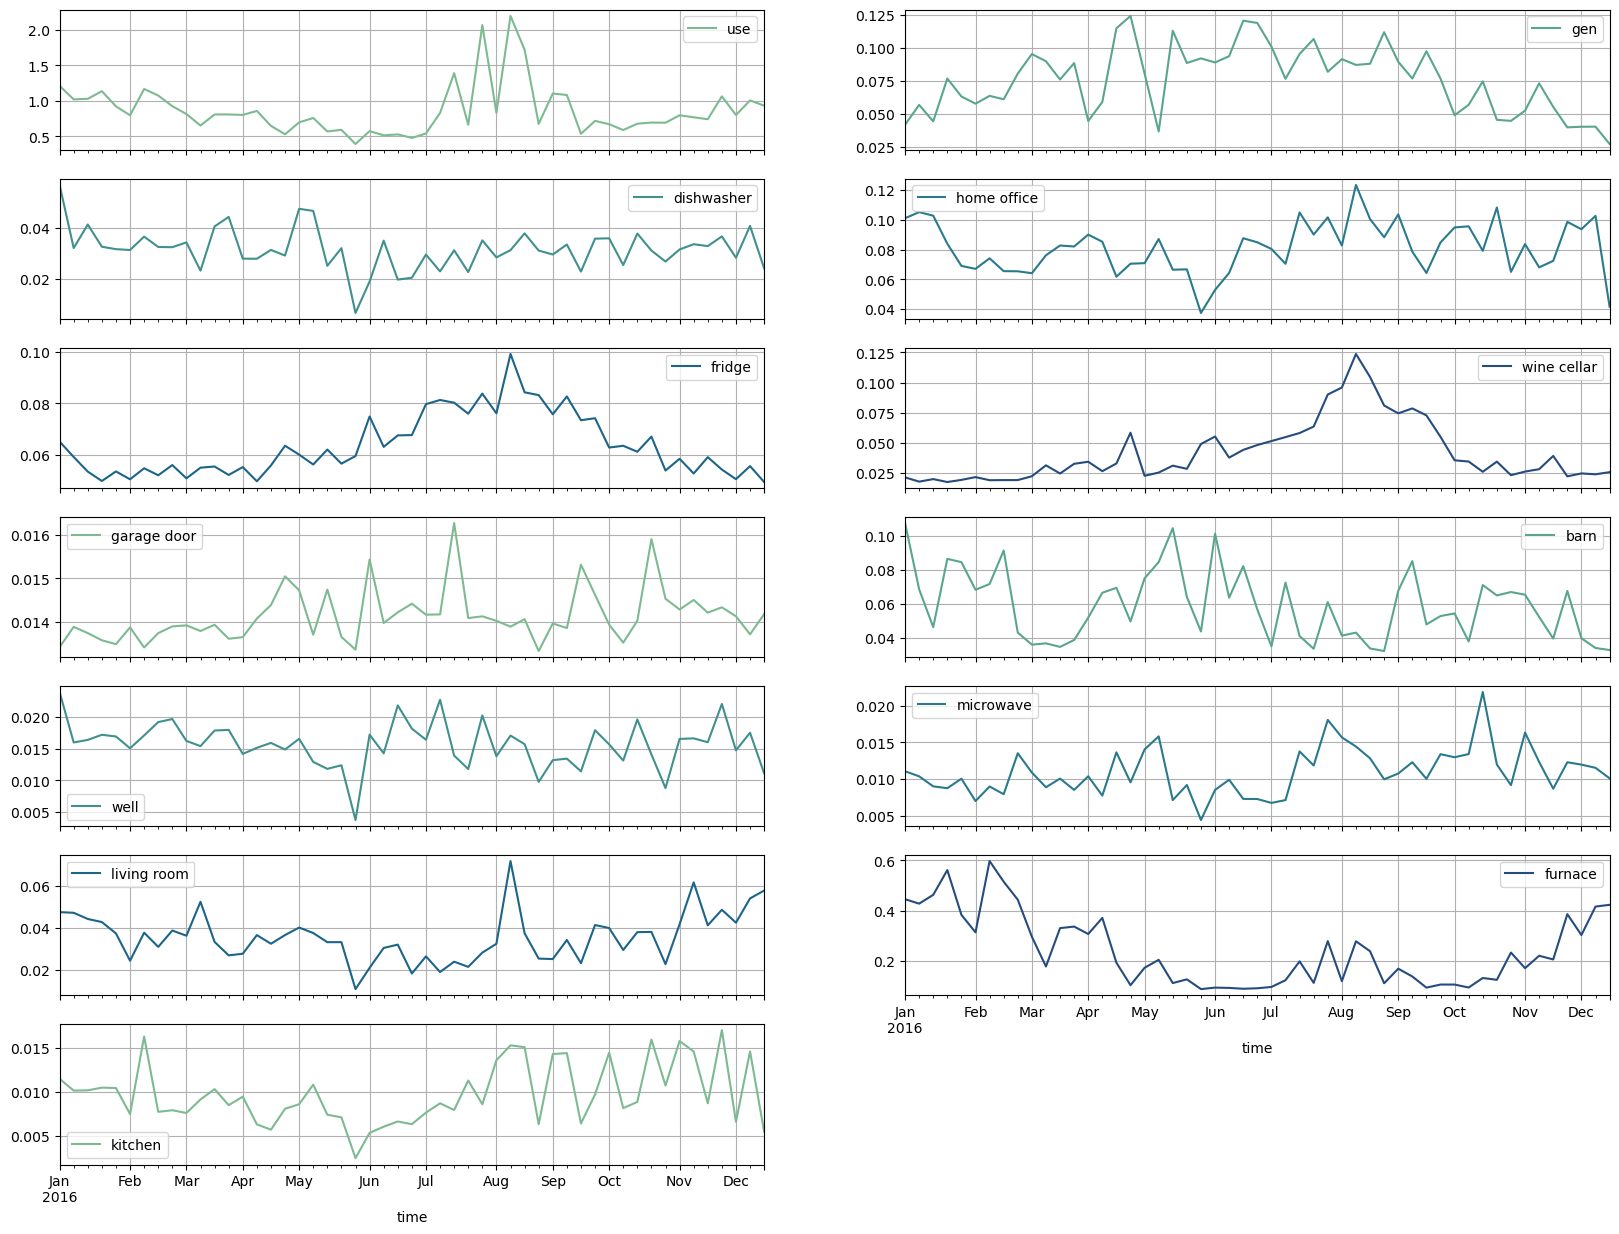

---------------------- MONTHLY ----------------------------


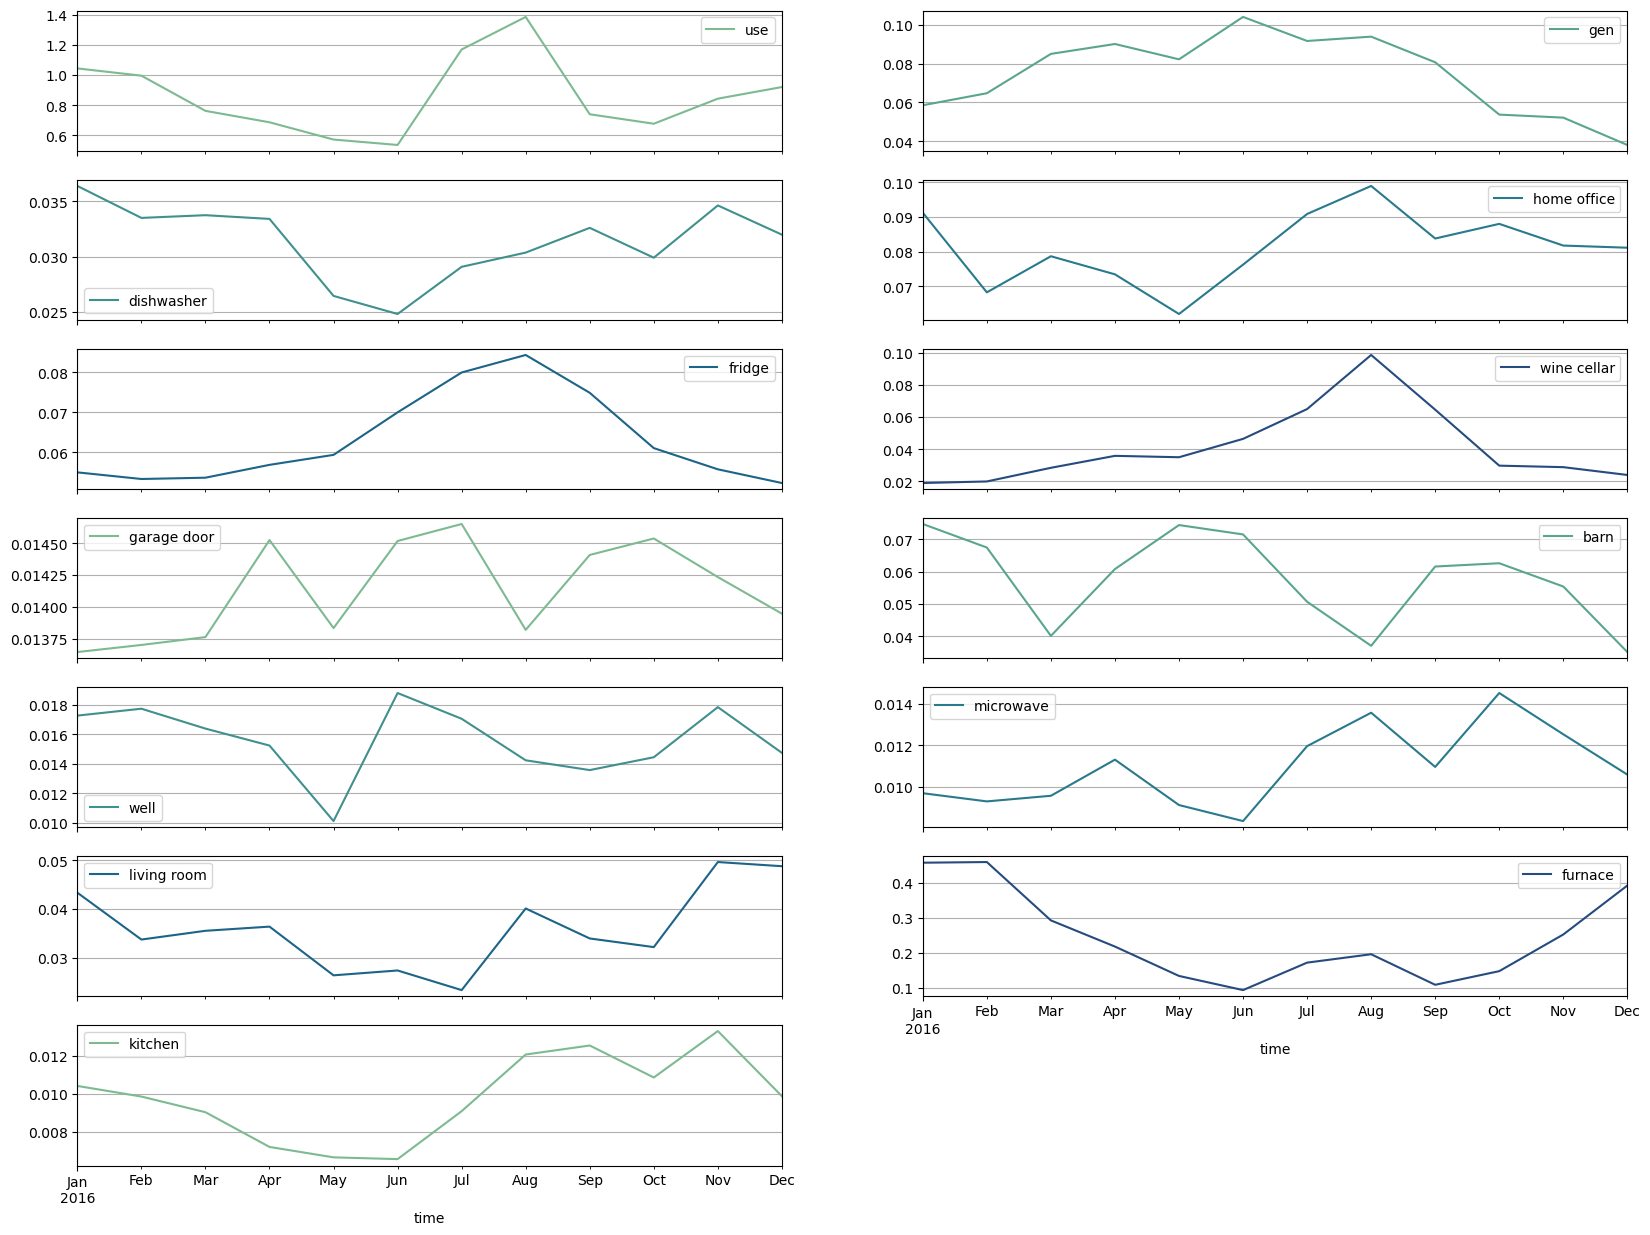

In [13]:
time_series_subplots(data,energy_cols)

##### *Added Columns*

---------------------- DAILY ----------------------------


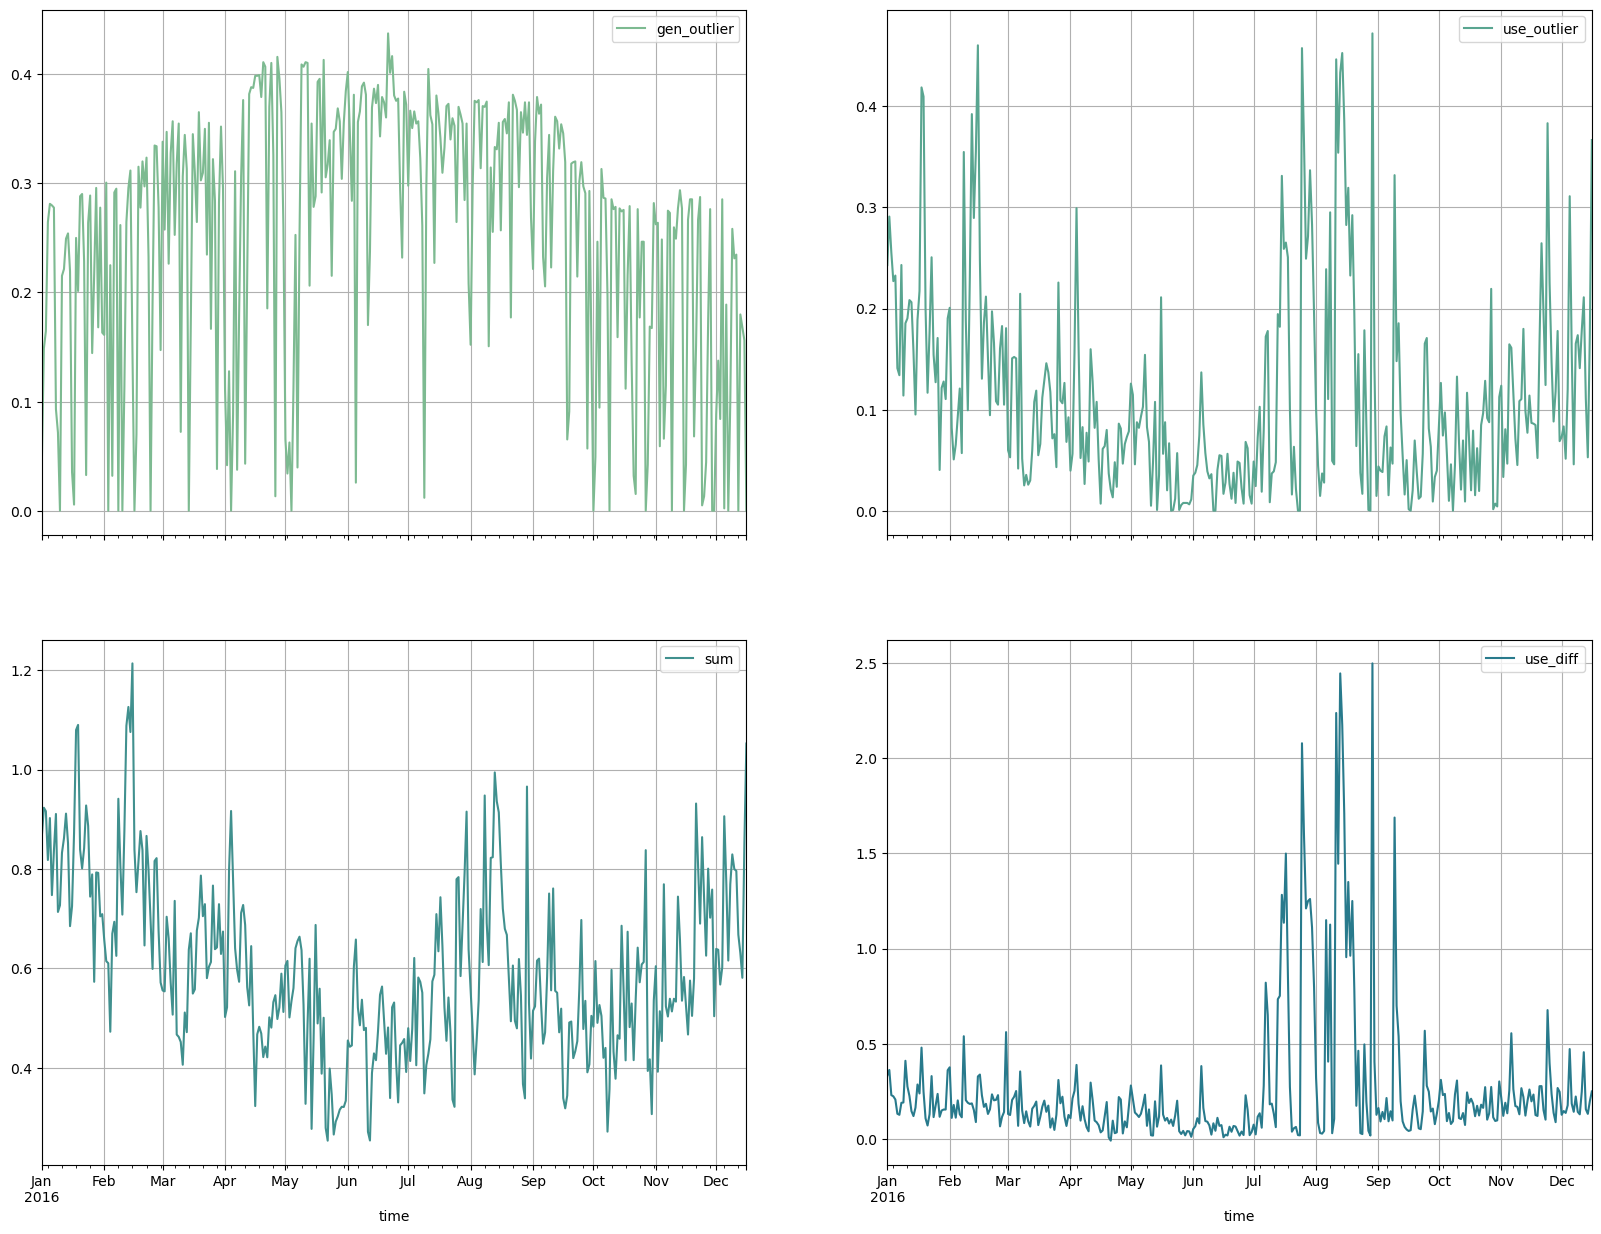

---------------------- WEEKLY ----------------------------


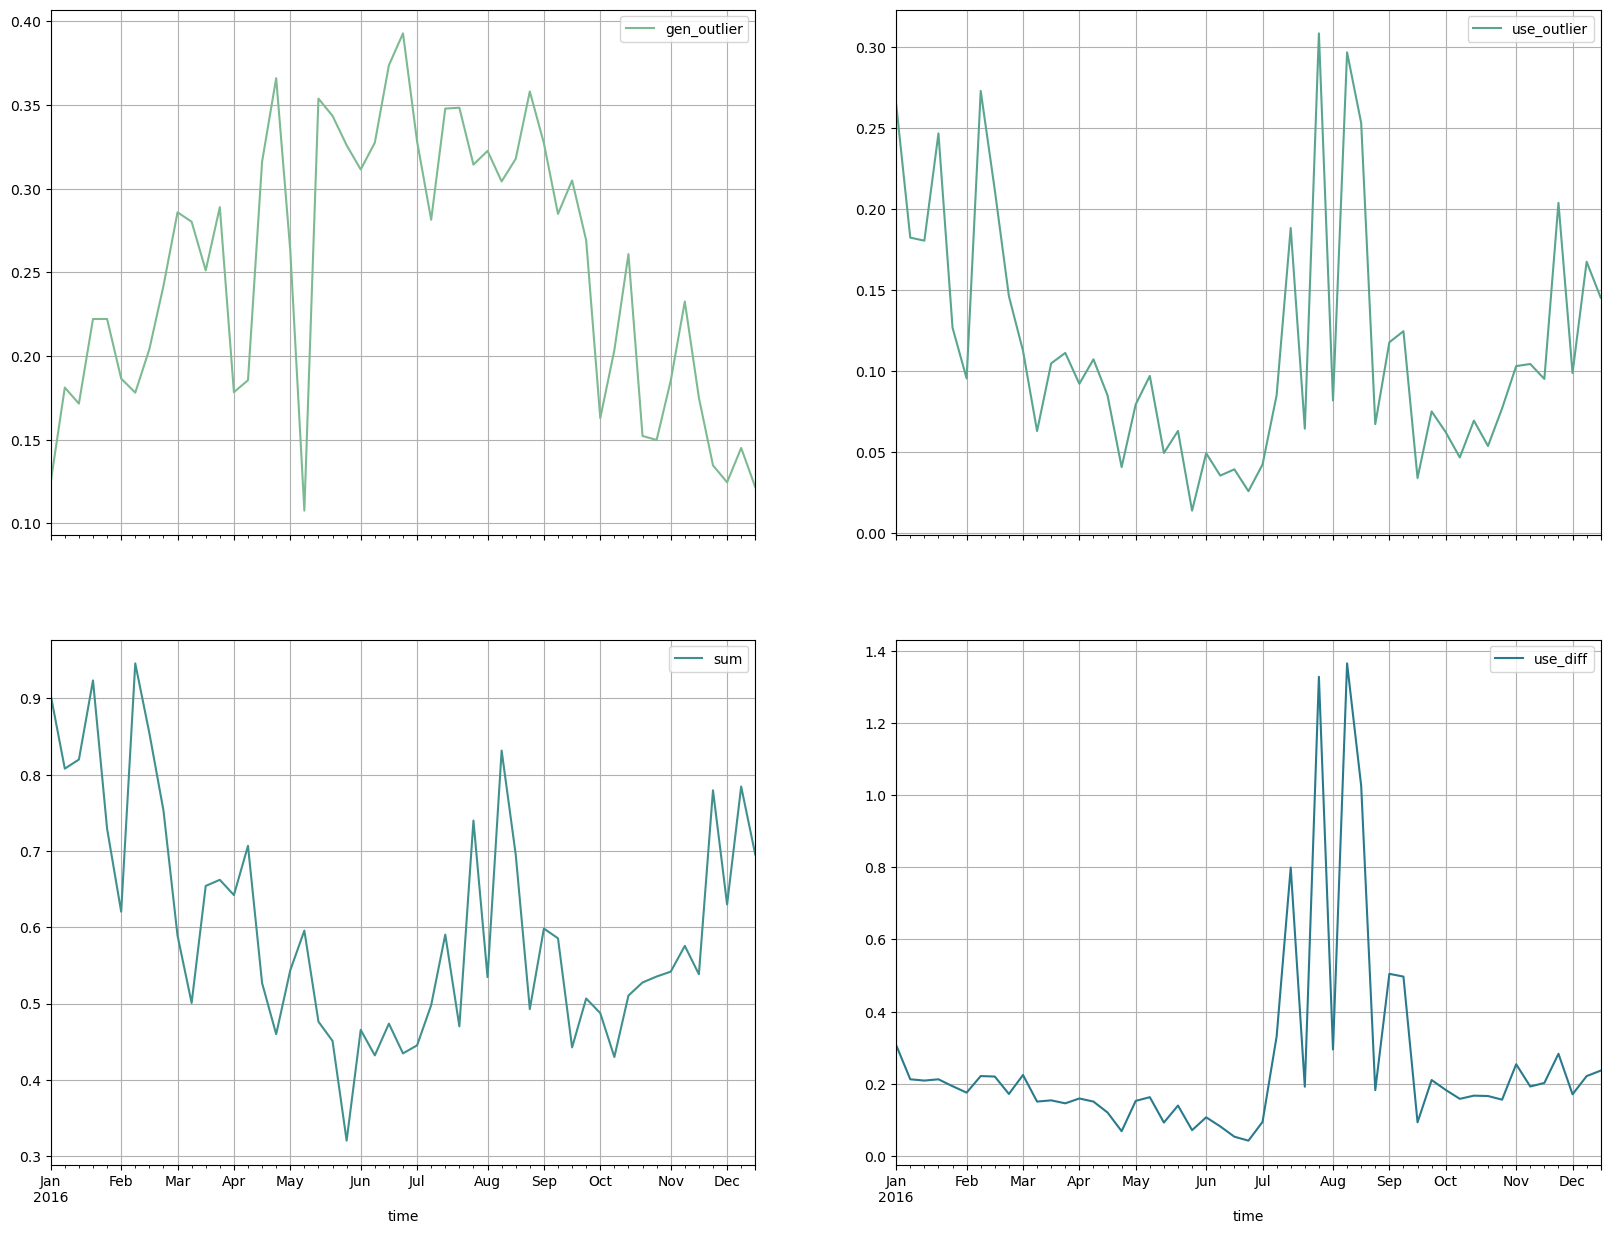

---------------------- MONTHLY ----------------------------


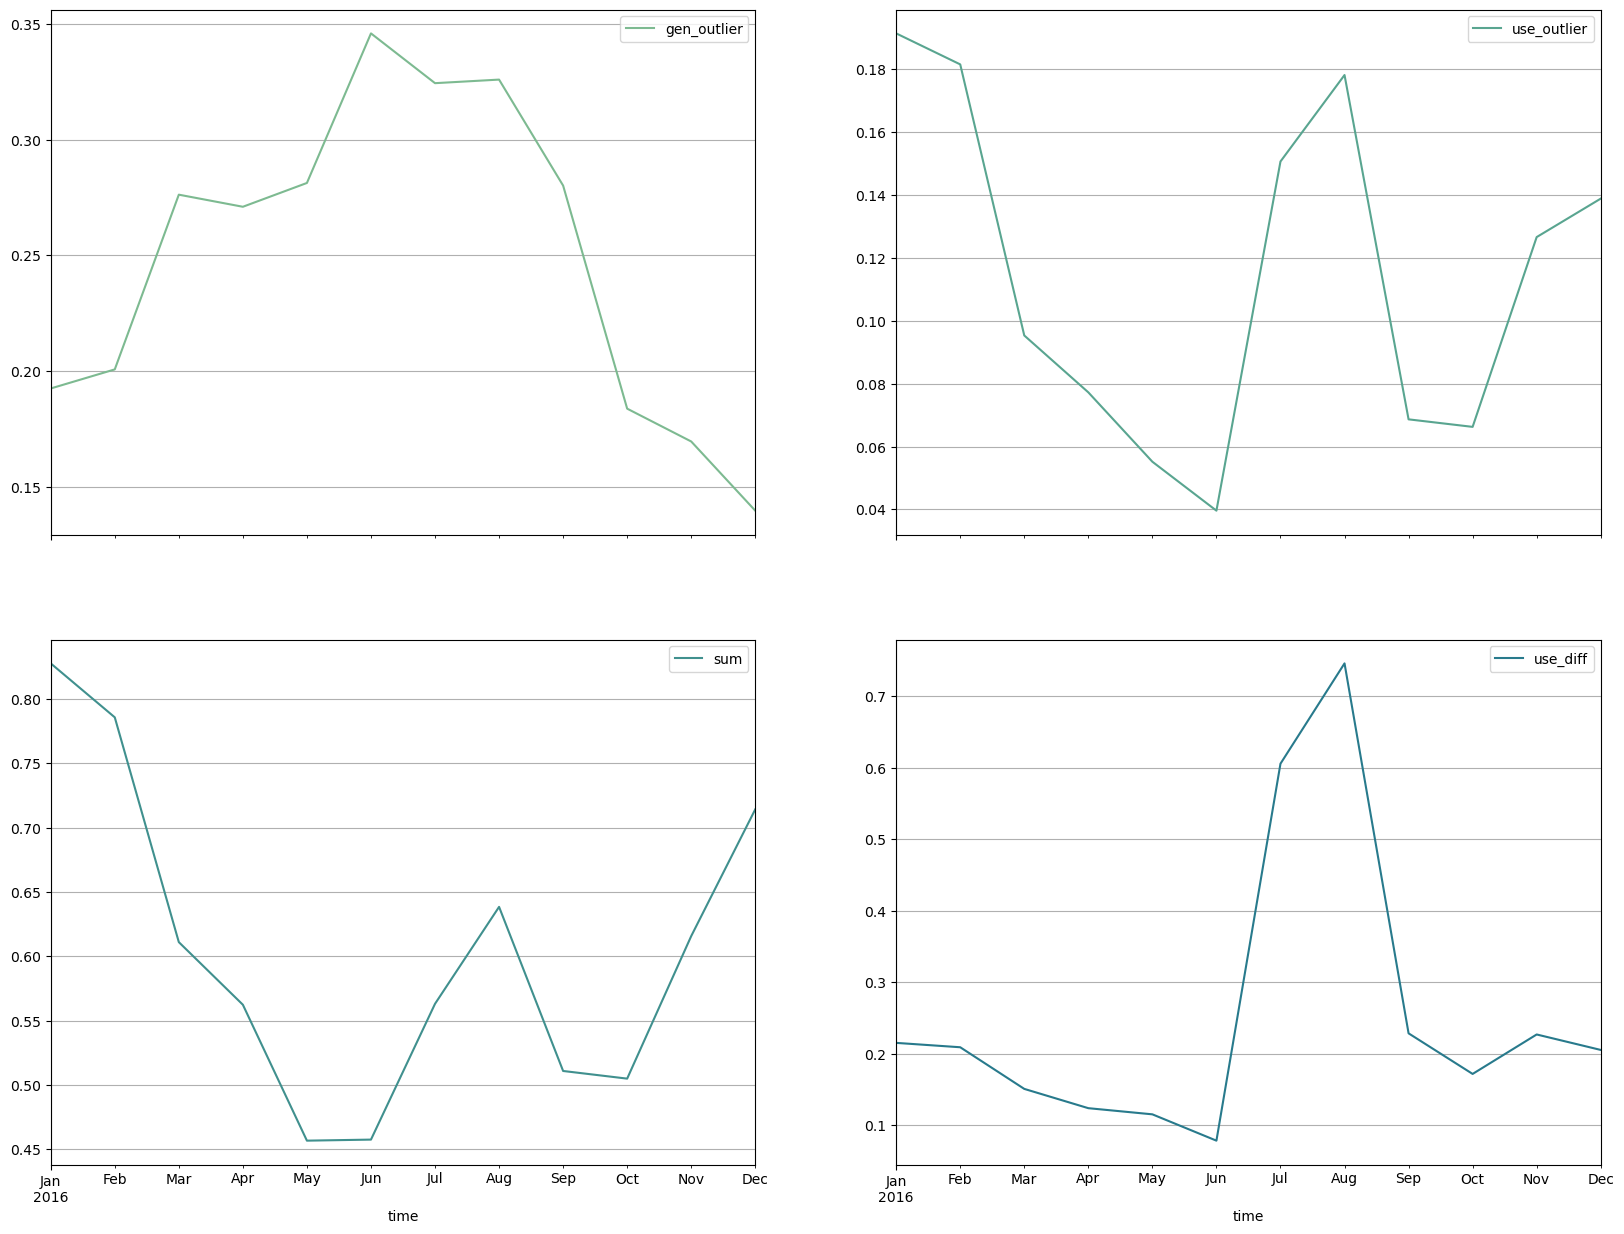

In [14]:
time_series_subplots(data,added_cols)